In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Saved from Chrome/student_exam_results.csv')
print(df)

   StudentID  AttendanceRate  StudyTime  FinalExamScore  Pass/Fail
0       S001             100        5.6            40.2          0
1       S002              67        4.2            40.0          0
2       S003              61        9.0            81.8          1
3       S004              77        8.1            63.9          1
4       S005              75        3.3            40.0          0
5       S006              74        5.4            40.0          0
6       S007              68        4.2            40.0          0
7       S008              66        3.7            40.0          0
8       S009              94        8.1            67.2          1
9       S010              65        2.8            40.0          0
10      S011              97        5.0            40.0          0
11      S012              87        4.9            40.0          0
12      S013              62        4.8            40.0          0
13      S014              61        4.1            40.0       

In [44]:
X = df[['StudyTime']]
y = df['FinalExamScore']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20, 1)
X_test shape: (5, 1)
y_train shape: (20,)
y_test shape: (5,)


In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 35.19337408052274
R-squared (R2): 0.701613505883028


In [49]:
X_logistic = df[['AttendanceRate', 'StudyTime']]
y_logistic = df['Pass/Fail']

In [37]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

print("X_train_logistic shape:", X_train_logistic.shape)
print("X_test_logistic shape:", X_test_logistic.shape)
print("y_train_logistic shape:", y_train_logistic.shape)
print("y_test_logistic shape:", y_test_logistic.shape)

X_train_logistic shape: (20, 2)
X_test_logistic shape: (5, 2)
y_train_logistic shape: (20,)
y_test_logistic shape: (5,)


In [38]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_logistic = logistic_model.predict(X_test_logistic)

accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic)
recall = recall_score(y_test_logistic, y_pred_logistic)
f1 = f1_score(y_test_logistic, y_pred_logistic)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [40]:
X_clustering = df[['StudyTime', 'AttendanceRate']]
display(X_clustering.head())

,StudyTime,AttendanceRate
0,5.6,100
1,4.2,67
2,9.0,61
3,8.1,77
4,3.3,75


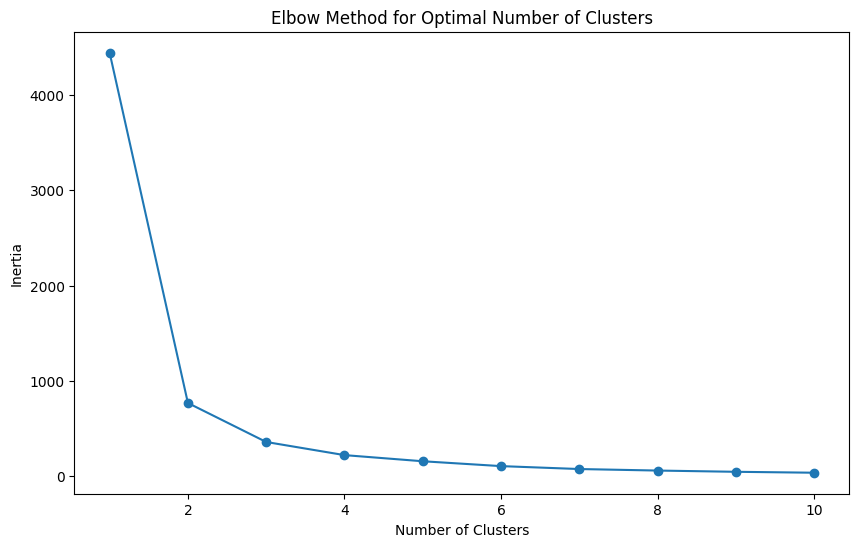

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_clustering)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_clustering)
display(df.head())

,StudentID,AttendanceRate,StudyTime,FinalExamScore,Pass/Fail,Cluster
0,S001,100,5.6,40.2,0,1
1,S002,67,4.2,40.0,0,0
2,S003,61,9.0,81.8,1,0
3,S004,77,8.1,63.9,1,2
4,S005,75,3.3,40.0,0,2


In [50]:
cluster_characteristics = df.groupby('Cluster')[['StudyTime', 'AttendanceRate', 'FinalExamScore', 'Pass/Fail']].mean()
display(cluster_characteristics)

,StudyTime,AttendanceRate,FinalExamScore,Pass/Fail
Cluster,,,,
0,4.377778,64.000000,45.277778,0.111111
1,5.666667,93.666667,49.211111,0.222222
2,5.314286,74.142857,47.771429,0.285714
